In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cv19gm.models.seir_meta import SEIRMETA
import cv19gm.utils.cv19mobility as cv19mob

# Meta-population SEIR model with 3 regions

## Build flux function

In [2]:
population = np.array([100000,200000,150000])
Phi = cv19mob.rnd_flux(population=population,fraction=0.1)

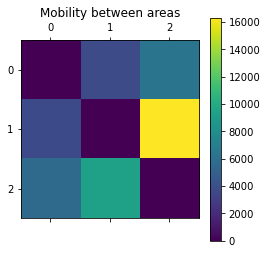

In [3]:
plt.matshow(Phi(0))
plt.title('Mobility between areas')
plt.colorbar()
plt.show()

In [4]:
beta = np.array([0.2,0.15,0.11])
mu = np.array([1,0.8,1.2])


I = np.array([1000,0,1500])
I_d = np.array([100,0,150])
R = np.array([5000,10000,7500])
I_ac = np.array([4500,9000,6500])

rR_S = 0

#E = False
#E_d = False
popfraction = 1  # np.array([1,1,1])

In [5]:
cfg = '/home/samuel/covid19geomodeller/config_files/SEIRMETA.toml'

In [6]:
seir = SEIRMETA(config=cfg,beta=beta,mu=mu,population=population,I=I,I_d=I_d,R=R,I_ac=I_ac,Phi=Phi,rR_S=rR_S,t_end=500)

In [7]:
seir.solve()

In [14]:
seir.global_results

,t,S,E,E_d,I,I_d,R,R_d
0,0,422200,2800,280,2500,250,22500,0
1,1,421841,2618,331,2776,431,22764,168
2,2,421448,2500,371,2998,480,23053,245
3,3,421026,2429,404,3181,487,23362,286
4,4,420581,2393,431,3336,483,23688,312
...,...,...,...,...,...,...,...,...
495,495,194148,0,0,2,0,255847,0
496,496,194148,0,0,2,0,255847,0
497,497,194148,0,0,2,0,255848,0
498,498,194148,0,0,2,0,255848,0


In [15]:
seir.results

,t,S,E,E_d,I,I_d,R,R_d,beta,tE_I,tI_R,rR_S,node
0,0,93000,1000,100,1000,100,5000,0,0,5,10,0,0
1,1,92957,928,110,1017,106,5097,36,0,5,10,0,0
2,2,92904,879,120,1027,106,5190,45,0,5,10,0,0
3,3,92846,844,128,1035,104,5279,47,0,5,10,0,0
4,4,92779,821,135,1042,104,5366,45,0,5,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,495,64709,0,0,0,0,85272,99,0,5,10,0,2
1496,496,64708,0,0,0,0,85272,99,0,5,10,0,2
1497,497,64708,0,0,0,0,85272,99,0,5,10,0,2
1498,498,64708,0,0,0,0,85272,99,0,5,10,0,2


In [ ]:
i = 1
plt.plot(seir.t,seir.S[i],label='S')
plt.plot(seir.t,seir.E[i],label='E')
plt.plot(seir.t,seir.I[i],label='I')
plt.plot(seir.t,seir.R[i],label='R')
plt.legend(loc=0)
plt.show()


In [ ]:
plt.plot(seir.t,seir.I[0],label='0')
plt.plot(seir.t,seir.I[1],label='1')
plt.plot(seir.t,seir.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

In [ ]:
seir.nodes

In [ ]:
list(range(seir.nodes))

In [ ]:

if seir.cfg['data']['state']:
    names = seir.cfg['data']['state']
elif seir.cfg['data']['county']:
    names = seir.cfg['data']['county']
else: 
    names = [str(i) for i in range(seir.nodes)]

In [ ]:
names

## Output

In [ ]:
seir.results

In [ ]:
seir.params

In [ ]:
np.shape(seir.S.sum(axis=0))

In [ ]:
plt.plot(seir.t,seir.S.sum(axis=0),label='S')
plt.plot(seir.t,seir.E.sum(axis=0),label='E')
plt.plot(seir.t,seir.I.sum(axis=0),label='I')
plt.plot(seir.t,seir.R.sum(axis=0),label='R')
plt.legend(loc=0)
plt.show()

In [ ]:
aux = {}
for i in range(seir.nodes):
    aux[str(i)] = seir.results.loc[seir.results['node']==i].to_dict('list')

In [ ]:
json.dumps(aux)

# With configuration file

In [ ]:
cfg = 'cfg/SEIRMETA.toml'

In [ ]:
seir2 = SEIRMETA(config=cfg)

In [ ]:
seir2.solve()

In [ ]:
plt.plot(seir2.t,seir2.I[0],label='0')
plt.plot(seir2.t,seir2.I[1],label='1')
plt.plot(seir2.t,seir2.I[2],label='2')
plt.legend(loc=0)
plt.title('Active Infected')
plt.show()

In [ ]:
seir2.results

In [ ]:
seir2.params

In [ ]:
seir2.nodes

In [ ]:
seir2.results

In [ ]:
aux = {}
for i in range(seir2.nodes):
    aux[str(i)] = seir2.results.loc[seir2.results['node']==i].to_dict()

In [ ]:
import json

In [ ]:
json.dumps(aux)